### 任务：基于zgpa_train.csv数据，建立RNN模型，预测股价：
#### 1.完成数据预处理，将序列数据转化为可用于RNN输入的数据
#### 2.对新数据zgpa_test.csv进行预测，可视化结果
#### 3.存储预测结果，并观察局部预测结果
#### 备注：模型结构：单层RNN，输出有5个神经元；每次使用前8个数据预测第9个数据

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('zgpa_train.csv')
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
#归一化处理
price = data.loc[:,'close']
price.head()
price_norm = price/max(price)
print(price_norm)

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('szzs30day.csv')
data.head()


,close
0,3310.10
1,3346.97
2,3339.90
3,3347.30
4,3363.09


In [4]:
max(price)

75.09

In [5]:
price = data.loc[:,'close']
price.head()
price_norm = price/max(price)
print(price_norm)

0     0.958910
1     0.969591
2     0.967543
3     0.969687
4     0.974261
5     0.978502
6     0.989151
7     0.985770
8     0.974041
9     0.976184
10    0.987361
11    0.982566
12    1.000000
13    0.999258
14    0.997161
15    0.997868
16    0.989762
17    0.987902
18    0.976830
19    0.977213
20    0.969655
21    0.976008
22    0.975460
23    0.975388
24    0.986364
25    0.983476
26    0.990912
27    0.972433
28    0.979832
29    0.974267
30    0.983957
31    0.984168
Name: close, dtype: float64


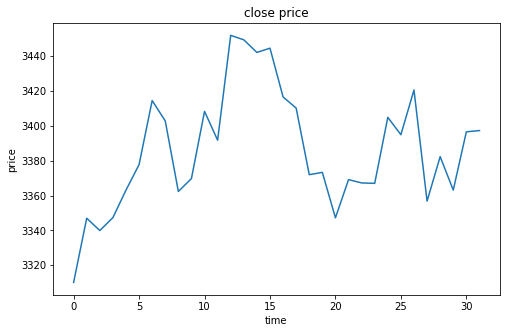

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [7]:
#定义X与y
def extract_data(data,time_step):
    X=[]
    y=[]
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X=np.array(X)
    X=X.reshape(X.shape[0],X.shape[1],1)
    return X,y


In [8]:
time_step=5
X,y=extract_data(price_norm,time_step)
print(X.shape)
print(X[0,:,:])
print(y)


(27, 5, 1)
[[0.95891006]
 [0.96959101]
 [0.96754289]
 [0.96968661]
 [0.97426085]]
[0.9785019438344815, 0.9891510281175222, 0.9857703204574819, 0.9740406843687897, 0.9761844064497065, 0.9873607304877836, 0.9825663250230305, 1.0, 0.9992583880368721, 0.9971610167036506, 0.997867865606007, 0.9897622786027567, 0.9879024548514748, 0.9768304199957125, 0.9772128136642004, 0.9696547448681031, 0.9760076942241174, 0.9754601760169643, 0.9753877529736902, 0.9863641894123304, 0.9834759584465547, 0.9909123565299514, 0.9724328928081022, 0.9798316309089962, 0.9742666442638053, 0.9839568474538954, 0.9841683227402562]


In [9]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

model=Sequential()
# RNN layer
model.add(SimpleRNN(units=5,input_shape=(time_step,1),activation='relu'))

#output layer
model.add(Dense(units=1,activation='linear')) # 线性回归模型，预测是价格，连续型变量

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

C:\Users\pactera\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X,y,batch_size=30,epochs=200)

Epoch 1/200
27/27 [==============================] - 0s 12ms/step - loss: 2.2151
Epoch 2/200
27/27 [==============================] - 0s 165us/step - loss: 2.1943
Epoch 3/200
27/27 [==============================] - 0s 202us/step - loss: 2.1765
Epoch 4/200
27/27 [==============================] - 0s 202us/step - loss: 2.1577
Epoch 5/200
27/27 [==============================] - 0s 147us/step - loss: 2.1384
Epoch 6/200
27/27 [==============================] - 0s 110us/step - loss: 2.1188
Epoch 7/200
27/27 [==============================] - 0s 92us/step - loss: 2.0991
Epoch 8/200
27/27 [==============================] - 0s 92us/step - loss: 2.0793
Epoch 9/200
27/27 [==============================] - 0s 74us/step - loss: 2.0595
Epoch 10/200
27/27 [==============================] - 0s 73us/step - loss: 2.0397
Epoch 11/200
27/27 [==============================] - 0s 92us/step - loss: 2.0200
Epoch 12/200
27/27 [==============================] - 0s 73us/step - loss: 2.0003
Epoch 13/200
27/27 [

In [11]:
y_train_predict=model.predict(X)*max(price)
y_train=[i *max(price) for i in y]


In [12]:
y_train_predict

array([[1833.9144],
       [1837.8042],
       [1853.917 ],
       [1838.9813],
       [1834.9342],
       [1842.8654],
       [1844.7191],
       [1832.2977],
       [1877.9264],
       [1845.6075],
       [1864.9674],
       [1860.1166],
       [1843.3063],
       [1851.7094],
       [1827.0454],
       [1841.995 ],
       [1818.299 ],
       [1842.5682],
       [1826.1023],
       [1837.4536],
       [1851.617 ],
       [1834.019 ],
       [1861.8512],
       [1816.1583],
       [1858.4053],
       [1816.3556],
       [1854.3528]], dtype=float32)

In [13]:
y_train_predict.shape
# print(y[-5:])
# print(X[-1])
# p=model.predict(list(y[-5:]))*max(price)
# print(p)

(27, 1)

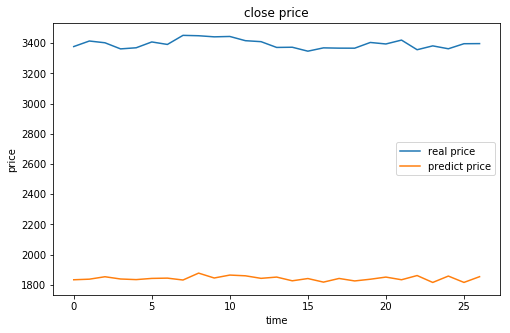

In [14]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [59]:
data_test = pd.read_csv('zgpa_test.csv')
data_test.head()
price_test = data_test.loc[:,'close']
price_test.head()
price_test_norm = price_test/max(price)
X_test_norm,y_test_norm=extract_data(price_test_norm,time_step)
print(X_test_norm.shape,len(y_test_norm))

(177, 5, 1) 177


In [75]:
data_test = pd.read_csv('555.csv')
data_test.head()
price_test = data_test.loc[:,'close']
price_test.head()
price_test_norm = price_test/max(price)
X_test_norm,y_test_norm=extract_data(price_test_norm,time_step)
print(X_test_norm.shape,len(y_test_norm))

(6, 5, 1) 6


In [76]:
data_test.tail()

,close
6,3363.11
7,3396.56
8,3397.29
9,3200.00
10,3300.00


In [77]:
X_test_norm

array([[[0.97538775],
        [0.98636419],
        [0.98347596],
        [0.99091236],
        [0.97243289]],

       [[0.98636419],
        [0.98347596],
        [0.99091236],
        [0.97243289],
        [0.97983163]],

       [[0.98347596],
        [0.99091236],
        [0.97243289],
        [0.97983163],
        [0.97426664]],

       [[0.99091236],
        [0.97243289],
        [0.97983163],
        [0.97426664],
        [0.98395685]],

       [[0.97243289],
        [0.97983163],
        [0.97426664],
        [0.98395685],
        [0.98416832]],

       [[0.97983163],
        [0.97426664],
        [0.98395685],
        [0.98416832],
        [0.92701495]]])

In [78]:
y_test_predict=model.predict(X_test_norm)*max(price)
y_test=[i *max(price) for i in y_test_norm]
y_test_predict

array([[3378.5674],
       [3377.6165],
       [3370.7053],
       [3386.5137],
       [3398.5754],
       [3261.3176]], dtype=float32)

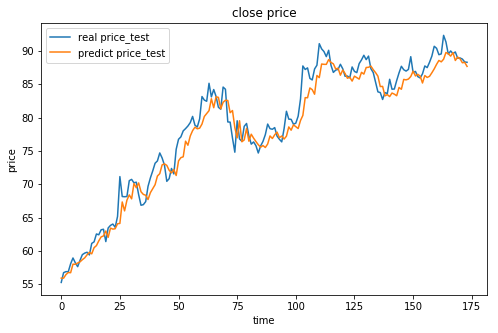

In [25]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(y_test,label='real price_test')
plt.plot(y_test_predict,label='predict price_test')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()